# Exercici de Clustering
### Àlex Alonso i Ricard Colet


### EXERCICI 1: Lectura i preparació del dataset
#### Dataset escollit: Jugadors de la NBA (1996-2021)

Per a fer l'exercici de clustering hem escollit el dataset de jugadors de la NBA. Com que no hi ha variable objectiu és lliure, hem decicit agrupar els jugadors per tipus segons el seu estil de joc.

### Preparació de les dades

1. Importació del dataset

In [101]:
#Processament de dades
import pandas as pd
#Gràfiques
import matplotlib.pyplot as plt
import seaborn as sns
#Models
import sklearn as skl

import numpy as np

#Importació del dataset (tenint en compte camps que tenen cometes dobles com un sol camp)
dataset = pd.read_csv('all_seasons.csv', quotechar='"', on_bad_lines='skip')

#Informació sobre el dataset importat
display(dataset.head())
print(dataset.info())


,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10985 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

In [106]:
print(dataset.info())
print(dataset.isnull().sum())

dataset['age'] = dataset['age'].astype(int)
dataset['gp'] = dataset['gp'].astype(int)

dataset['college'] = dataset['college'].fillna('Unknown')

display(dataset.head())
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  int64  
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            12844 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,cluster,pca1,pca2
0,0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,...,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,2,-0.732119,-0.811657
1,1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,8.9,0.030,0.111,0.174,0.497,0.043,1996-97,2,-1.418007,-0.076368
2,2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,...,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97,1,0.631284,0.810806
3,3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,...,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97,1,0.019828,-0.183460
4,4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,...,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97,2,-1.443018,0.045087


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  int64  
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            12844 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

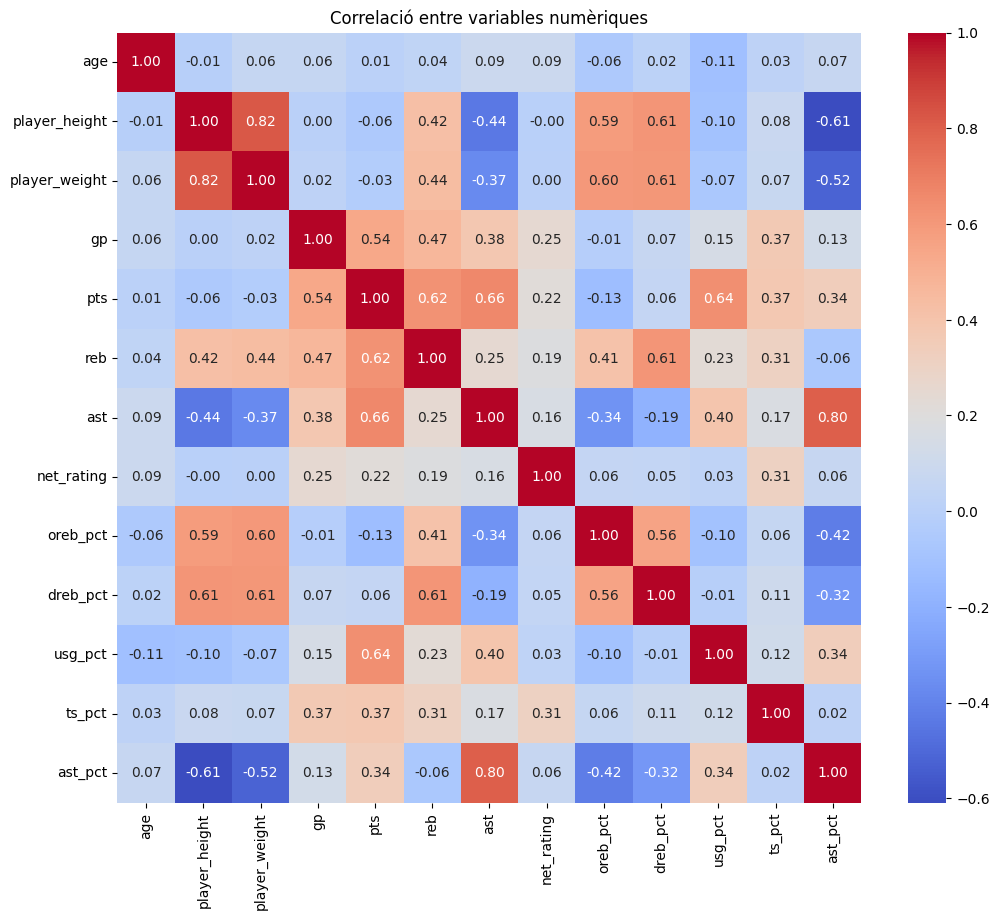

In [ ]:
# Aplicar One-Hot Encoding a TOTES les columnes categòriques
dataset_parsed = dataset.drop(columns=['id', 'player_name', 'college',])
df_encoded = pd.get_dummies(dataset_parsed, columns=['team_abbreviation', 'country', 'draft_year', 'draft_round', 'draft_number', 'season'], drop_first=True)

# Mostrar el DataFrame resultants
#print(df_encoded.head())

# Ordenar per correlació màxima amb la variable objectiu (ex: 'pts')
numerical_features = dataset_parsed.select_dtypes(include=['float64', 'int64'])
correlation = numerical_features.corr()
#corr_target = correlation['pts'].abs().sort_values(ascending=False)
#ordered_cols = corr_target.index

# Heatmap ordenat
plt.figure(figsize=(12, 10))
#sns.heatmap(correlation.loc[ordered_cols, ordered_cols], annot=True, fmt=".2f", cmap='coolwarm')
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')

plt.title("Correlació entre variables numèriques")
plt.show()

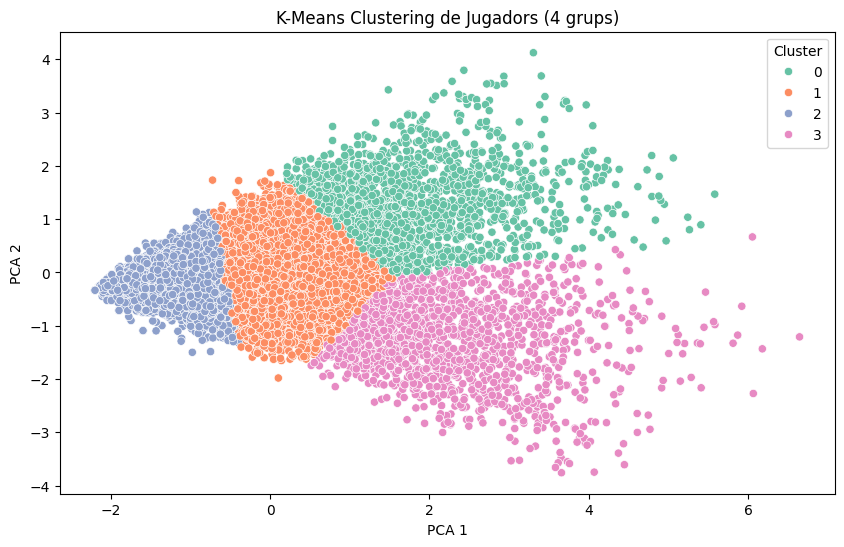

         player_height  player_weight    age    pts   reb   ast  usg_pct  \
cluster                                                                    
0               208.37         110.83  27.08  14.96  8.40  2.05     0.21   
1               200.31          99.93  27.26   8.85  3.81  1.81     0.18   
2               200.62          99.95  26.74   3.28  1.75  0.72     0.16   
3               192.60          90.98  27.49  17.21  4.23  5.70     0.24   

         ts_pct  
cluster          
0          0.56  
1          0.54  
2          0.47  
3          0.54  


In [105]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Escalar les dades
columns_performance = ['pts', 'reb', 'ast']
columns_physic_type = ['player_height', 'player_weight', 'age']

X = df_encoded[columns_performance]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Aplicar K-means amb 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
dataset['cluster'] = kmeans.fit_predict(X_scaled)

#Visualitzar amb 2D (usant PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
dataset['pca1'] = components[:, 0]
dataset['pca2'] = components[:, 1]

#Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('K-Means Clustering de Jugadors (4 grups)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

#Veure informació dels perfils de jugadors
cluster_profiles = dataset.groupby('cluster')[['player_height', 'player_weight', 'age', 'pts', 'reb', 'ast', 'usg_pct', 'ts_pct']].mean().round(2)
print(cluster_profiles)



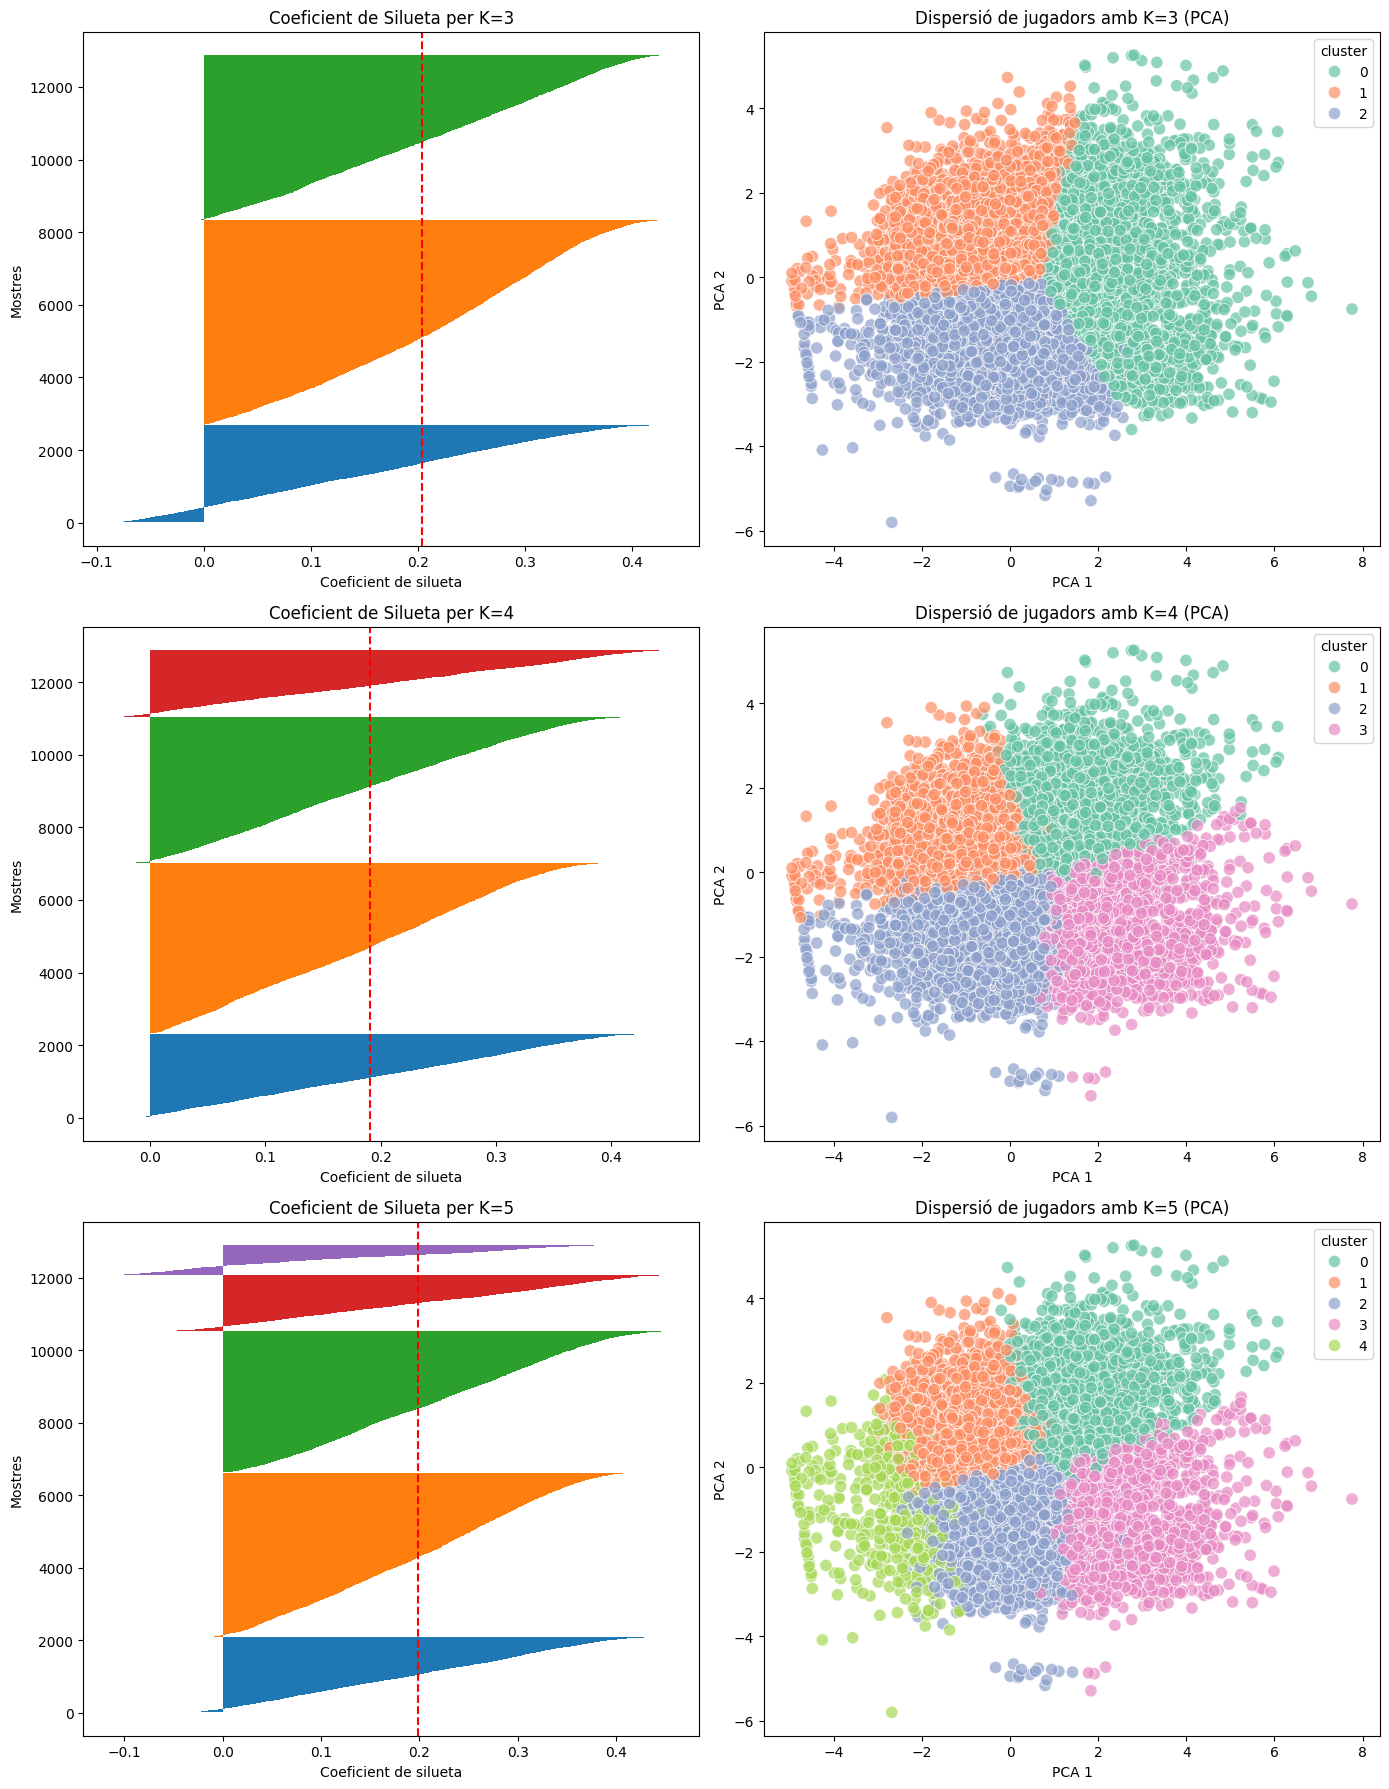

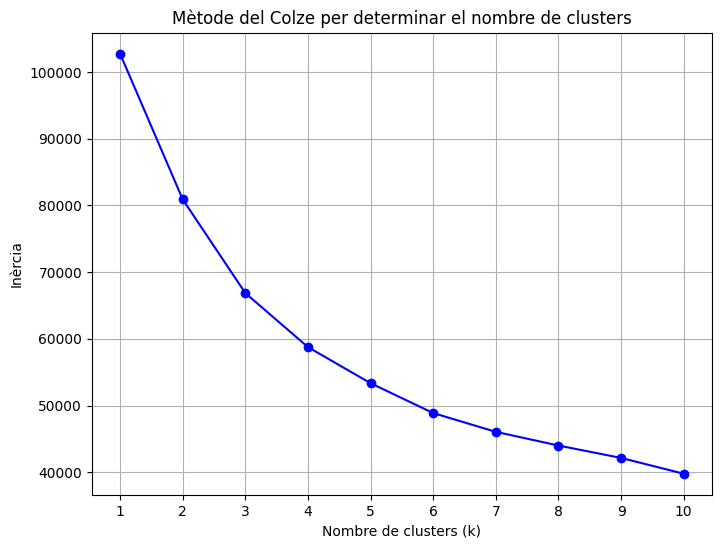

In [97]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Escalar les dades
columns_performance = ['player_height', 'player_weight', 'age', 'pts', 'reb', 'ast', 'usg_pct', 'ts_pct']
X = df_encoded[columns_performance]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear la figura amb subgràfics per cada k
fig, axs = plt.subplots(3, 2, figsize=(14, 18))  # 3 files, 2 columnes de subgràfics (silhouette a l'esquerra, dispersió a la dreta)

k_range = range(3, 6)  # Valors de k entre 3 i 5

for i, k in enumerate(k_range):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    # Coeficient de silueta per cada mostra
    sample_silhouette_values = silhouette_samples(X_scaled, kmeans.labels_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

    # Visualització de la silueta a l'esquerra (subgràfic de la primera columna)
    ax = axs[i, 0]  # Seleccionem la posició corresponent (esquerra)
    y_lower = 10
    for j in range(k):
        cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == j]
        cluster_silhouette_values.sort()
        size_cluster = len(cluster_silhouette_values)
        y_upper = y_lower + size_cluster
        ax.barh(range(y_lower, y_upper), cluster_silhouette_values, height=1.0, edgecolor='none')
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel("Coeficient de silueta")
    ax.set_ylabel("Mostres")
    ax.set_title(f"Coeficient de Silueta per K={k}")

    # Visualització de la dispersió a la dreta (subgràfic de la segona columna)
    ax = axs[i, 1]  # Seleccionem la posició corresponent (dreta)
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_scaled)
    dataset = df_encoded.copy()
    dataset['cluster'] = kmeans.labels_
    sns.scatterplot(data=dataset, x=components[:, 0], y=components[:, 1], hue='cluster', palette='Set2', s=80, alpha=0.7, ax=ax)
    ax.set_title(f'Dispersió de jugadors amb K={k} (PCA)')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

# Ajustar la disposició per evitar el solapament
plt.tight_layout()

# Mostrar els gràfics
plt.show()


# Gràfic del Mètode del Colze (Elbow Method)
inertias = []
for k in range(1, 11):  # Mirem de 1 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Visualitzar el gràfic del colze
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='-', color='b')
plt.title('Mètode del Colze per determinar el nombre de clusters')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inèrcia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

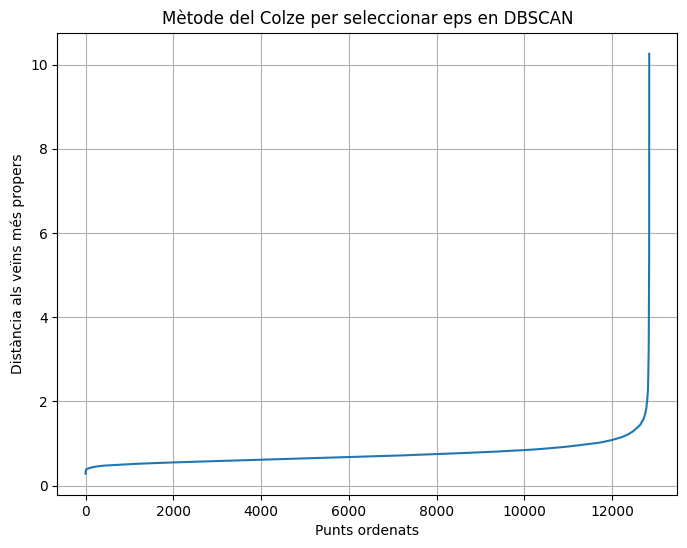

Nombre de clústers trobats: 4
Nombre de punts considerats soroll (assignats a -1): 1795
cluster_dbscan
 0    11022
-1     1795
 2       17
 1       10
Name: count, dtype: int64


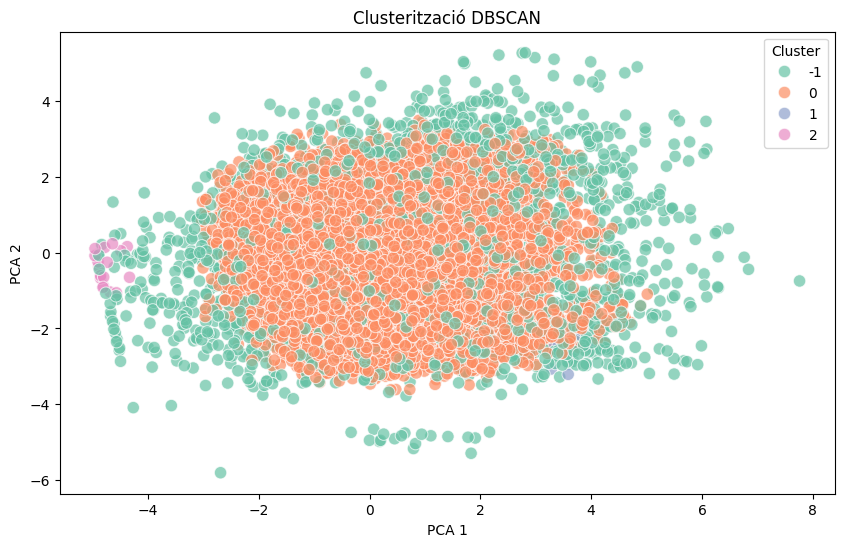

In [98]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Escalar les dades
columns_performance = ['player_height', 'player_weight', 'age', 'pts', 'reb', 'ast', 'usg_pct', 'ts_pct']
X = df_encoded[columns_performance]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mètode del colze per trobar el millor valor d'eps
neigh = NearestNeighbors(n_neighbors=2 * len(columns_performance))  
neigh.fit(X_scaled)
distances, indices = neigh.kneighbors(X_scaled)
distances = np.sort(distances[:, 3], axis=0)  

# Gràfic del mètode del colze per DBSCAN
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('Mètode del Colze per seleccionar eps en DBSCAN')
plt.xlabel('Punts ordenats')
plt.ylabel('Distància als veïns més propers')
plt.grid(True)
plt.show()

# A partir del gràfic, seleccionem un valor adequat per a eps (en aquest cas, pot ser 1 com a exemple)
eps = 1  # Potser provar amb 0.5 o 0.3
min_samples = 2 * len(columns_performance)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_encoded['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# Visualització de resultats
print(f"Nombre de clústers trobats: {len(np.unique(df_encoded['cluster_dbscan']))}")
print(f"Nombre de punts considerats soroll (assignats a -1): {np.sum(df_encoded['cluster_dbscan'] == -1)}")

# Resultats de la clusterització
print(df_encoded['cluster_dbscan'].value_counts())  # Mostra la quantitat de mostres per cada clúster

# Visualització de resultats (utilitzant PCA per reduir la dimensió a 2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_encoded['pca1'] = components[:, 0]
df_encoded['pca2'] = components[:, 1]

# Visualització de la dispersió dels clústers obtinguts amb DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='pca1', y='pca2', hue='cluster_dbscan', palette='Set2', s=80, alpha=0.7)
plt.title('Clusterització DBSCAN')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

